Test reading EMNIST dataset in Julia

using MAT

In [1]:
using MAT
using CairoMakie

In [2]:
train = matopen(joinpath("EMNIST", "emnist-digits.mat"))

MAT.MAT_v5.Matlabv5File(IOStream(<file EMNIST/emnist-digits.mat>), false, #undef)

In [3]:
vars = matread(joinpath("EMNIST", "emnist-digits.mat"))

Dict{String, Any} with 1 entry:
  "dataset" => Dict{String, Any}("test"=>Dict{String, Any}("images"=>UInt8[0x00…

In [4]:
keys(vars)

KeySet for a Dict{String, Any} with 1 entry. Keys:
  "dataset"

In [5]:
# The image data is stored as a vector - reshape to a 28x28 matrix to view
reshape(vars["dataset"]["train"]["images"][1,:], (28, 28))

28×28 Matrix{UInt8}:
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x21  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x7d  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x7f  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x7f  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x7f  0x00  0x00  0x00  0x00  0x00
    ⋮                             ⋮  ⋱                       ⋮        
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x02  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0

In [6]:
# The labels are stored as floats
Int(vars["dataset"]["train"]["labels"][1])

8

Note, need to rotate the image 90' clockwise (`rotr90`) to get the correct orientation for viewing as a heatmap (doesn't matter for the ML model!)

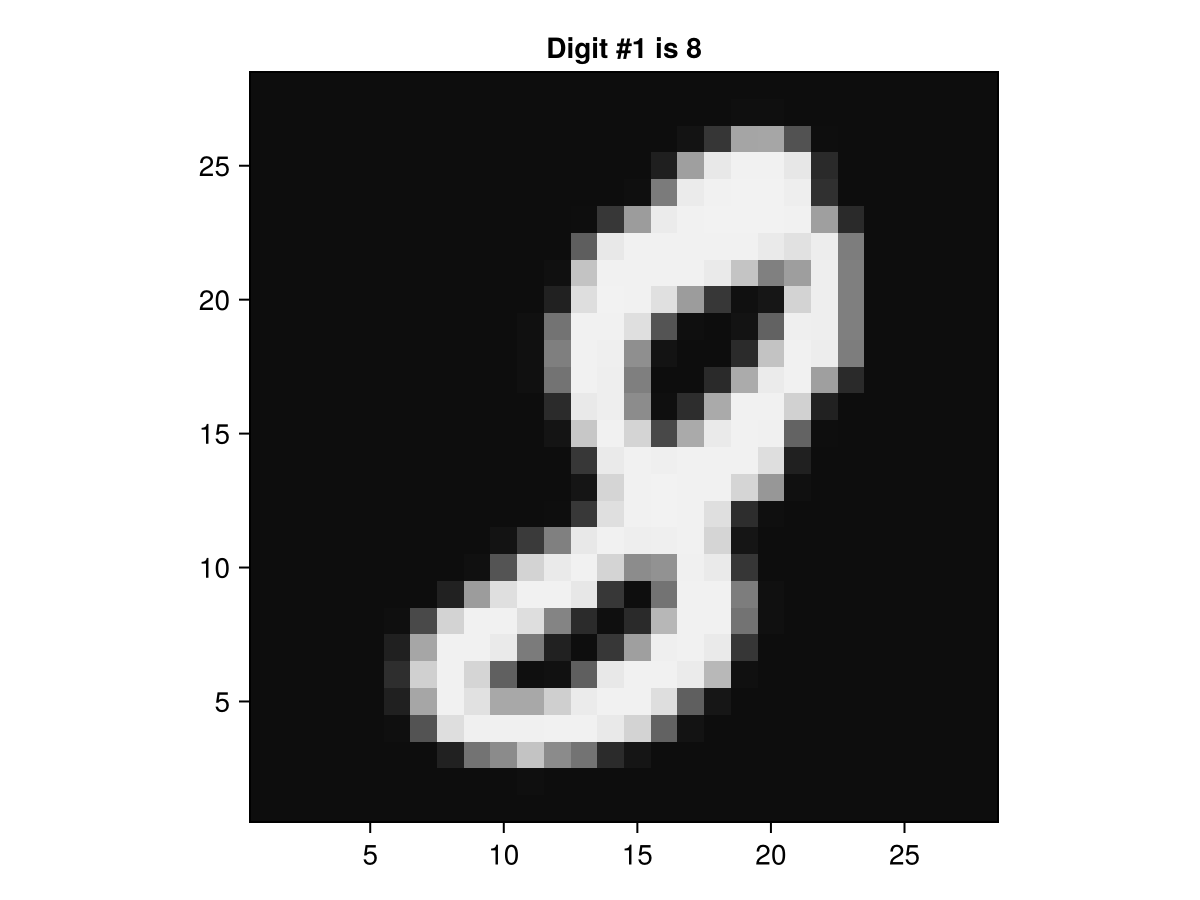

In [7]:
heatmap(rotr90(reshape(vars["dataset"]["train"]["images"][1,:], (28, 28))), 
    colormap = :grays, 
    colorrange = (0, 255), 
    axis = (aspect = DataAspect(), 
    title = "Digit #1 is $(Int(vars["dataset"]["train"]["labels"][1]))"),
    )

In [8]:
"""
    pos(v, cols)

Map an integer value to a [row, col] position in a grid of `cols` columns.
"""
function pos(v, cols)
    return mod1(v, cols), div(v - 1, cols) + 1
end

pos

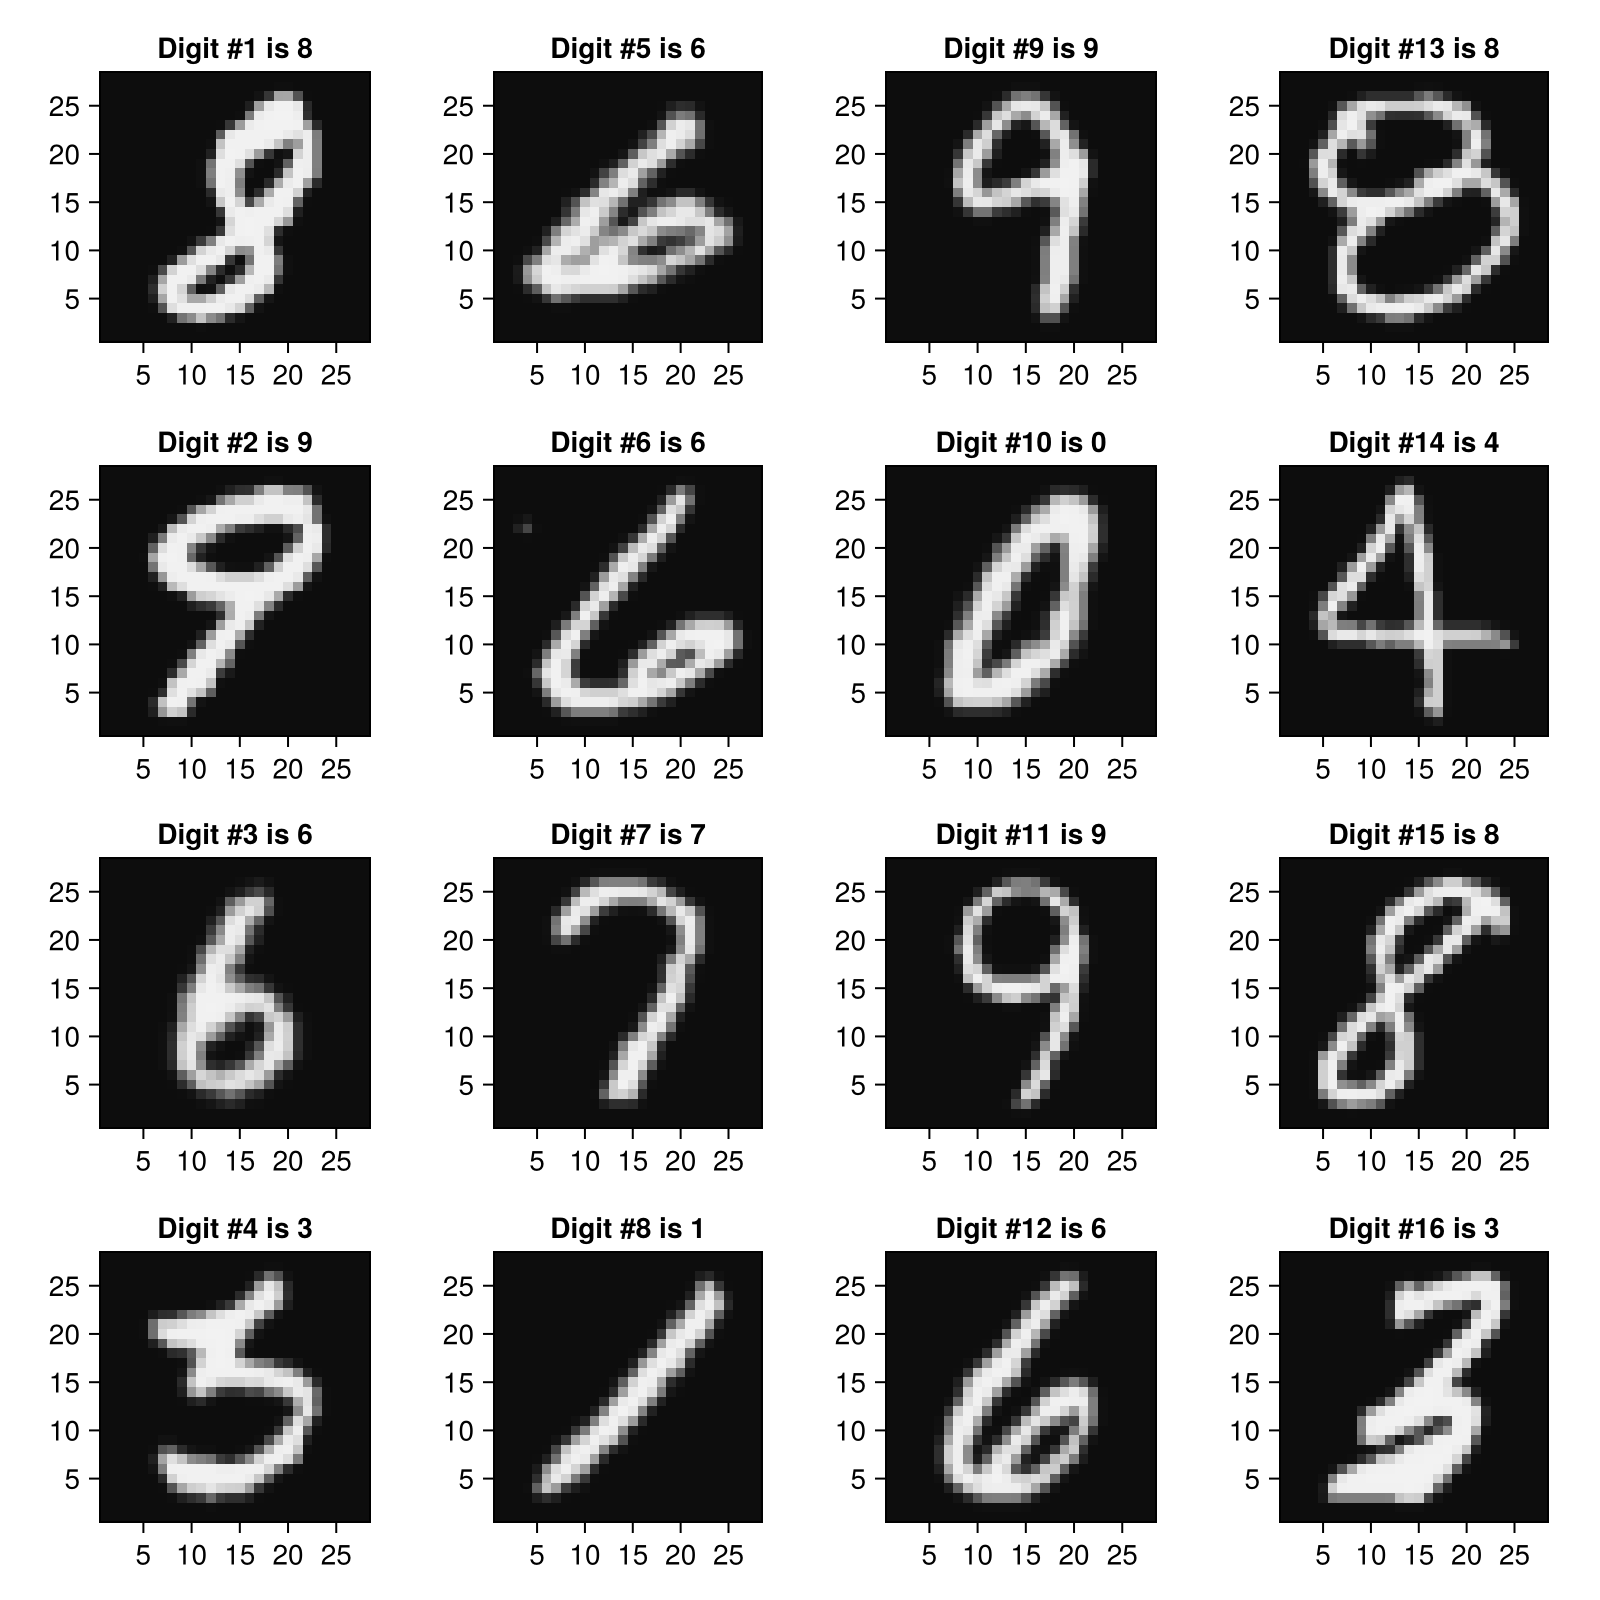

In [9]:
# Now plot a bunch of the first digits
f = Figure(size=(800,800))
for d in 1:16
    ax = Axis(f[pos(d,4)...], aspect = DataAspect(), 
        title = "Digit #$d is $(Int(vars["dataset"]["train"]["labels"][d]))",)
    heatmap!(ax, rotr90(reshape(vars["dataset"]["train"]["images"][d,:], (28, 28))), 
        colormap = :grays, 
        colorrange = (0, 255), 
    )
end
f